# K-means Clustering - 군집분석
# 1. Import Packages and Lead Dataset

> ## 1) Import Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

> ## 2) Load Dataset

- Load iris Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

- iris : Dictionary
   - X : iris.data
   - y : iris.target

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

- pandas DataFrame

In [ ]:
df = pd.DataFrame(data = iris.data,
                  columns = ['sepal_length',
                             'sepal_width',
                             'petal_length',
                             'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. K-means Clustering

>  ## 1) Modeling

- n_clusters : 군집 개수 지정
- init : 초기 중심 설정 방식(기본값)
- max_iter : 최대 반본 횟수

In [ ]:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters = 3,
                  init = 'k-means++',
                  max_iter = 15,
                  random_state = 2045)
kmeans_3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2045, tol=0.0001, verbose=0)

> ## 2) Clustering Results

- 반복 횟수

In [ ]:
kmeans_3.n_iter_

3

- 군집별 중심점

In [ ]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

- 군집 결과 레이블

In [ ]:
kmeans_3.labels_
# 군집 0, 1, 2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

- 군집 중심까지의 제곱 거리의 합

In [26]:
kmeans_3.inertia_
# 중심점으로부터 거리 제곱의 합

78.85144142614601

# 3. Scree Plot

> ## 1) DataFrame

In [ ]:
z = pd.DataFrame(data = iris.data,
                 columns = ['sepal_length',
                             'sepal_width',
                             'petal_length',
                             'petal_width'])
z.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> ## 2) K(1~10) 군집 분석

In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters= k)
    kmeanModel.fit(z)
    inertia.append(kmeanModel.inertia_)

> ## 3) 군집 중심까지의 제곱 거리의 합

In [ ]:
inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.35425513506102,
 34.42777741702742,
 30.063110617452725,
 27.86142885623149]

> ## 4) Plot the elbow

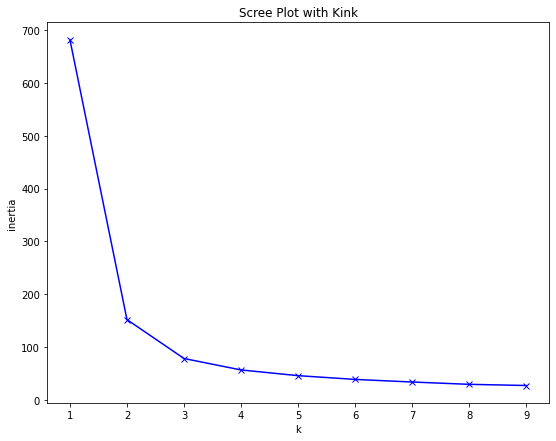

In [ ]:
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

# 4. Visualization with PCA(Principal Component Analysis)

> ## 1) target 및 cluster 추가

In [ ]:
df['cluster'] = kmeans_3.labels_
df['target'] = iris.target
# 원 데이터셋에 추가
# cluster = 군집분석 결과

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


> ## 2) 군집 결과 확인

In [ ]:
df.groupby('target')['cluster'].value_counts()

target  cluster
0       1          50
1       0          48
        2           2
2       2          36
        0          14
Name: cluster, dtype: int64

> ## 3) PCA 차원 축소(4차원 -> 2차원)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # 2차원으로 축소
pca_transformed = pca.fit_transform(iris.data)
pca_transformed[:5]
# 왼쪽이 0(pca_x), 오른쪽이 1(pca_y)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

> ## 4) pca_x와 pca_y 추가

In [ ]:
df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


> ## 5) 2차원 시각화

- 군집 값 0, 1, 2 인덱스 추출

In [ ]:
idx_0 = df[df['cluster'] == 0].index
idx_1 = df[df['cluster'] == 1].index
idx_2 = df[df['cluster'] == 2].index

In [ ]:
idx_0, idx_1, idx_2

(Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'))

- 0, 1, 2 인덱스 시각화

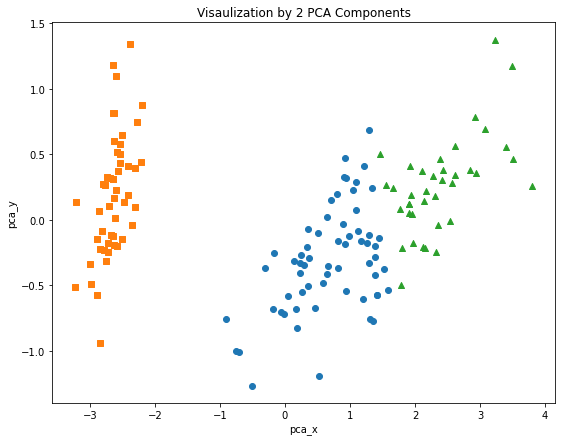

In [ ]:
plt.figure(figsize = (9, 7))
plt.scatter(x = df.loc[idx_0, 'pca_x'],
            y = df.loc[idx_0, 'pca_y'],
            marker = 'o')
plt.scatter(x = df.loc[idx_1, 'pca_x'],
            y = df.loc[idx_1, 'pca_y'],
            marker = 's')
plt.scatter(x = df.loc[idx_2, 'pca_x'],
            y = df.loc[idx_2, 'pca_y'],
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visaulization by 2 PCA Components')
plt.show()

### 
# The End
###